In [19]:
import numpy as np
import pandas as pd
import pickle
import keras
import tensorflow as tf
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import json
from absl import app
from absl import flags

import matplotlib.pyplot as plt

In [20]:
## function to load model history
def load_obj(name,  path = 'saved_model_components/'):
    with open(path + name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [4]:
## params
bs = 256

## read in data
train_data = pd.read_csv('../data_lr/trainX.csv', index_col = 0)
train_labels = pd.read_csv('../data_lr/trainY.csv', index_col = 0)
test_data = pd.read_csv('../data_lr/testX.csv', index_col = 0)
test_labels = pd.read_csv('../data_lr/testY.csv', index_col = 0)

train_data = train_data.reset_index()
train_data.drop(['index'], axis = 1, inplace = True)
last_index = (train_data.shape[0]//bs  * bs) + 1

train_data = train_data.iloc[1:last_index, :]
train_labels = train_labels.iloc[1:last_index, :]

In [5]:
baseline_te = test_labels.grade_class.value_counts()[0]/test_labels.grade_class.value_counts().sum()
baseline_tr = train_labels.grade_class.value_counts()[0]/train_labels.grade_class.value_counts().sum()

baseline_tr, baseline_te

(0.5635038789335665, 0.5555585898031077)

In [8]:
# get sizes of data
n_train = train_data.shape[0]
n_features = train_data.shape[1]
n_test = test_data.shape[0]

In [9]:
# # Define a sequential Keras model
# model = tf.keras.Sequential([
#   tf.keras.layers.Dense(50, activation='relu', input_shape=(n_features,)),
#   tf.keras.layers.Dense(25, activation='relu'),
#   tf.keras.layers.Dense(3)])

# model.load_weights('saved_model_components/edx_model_wts_DPSGD.h5')

In [10]:
list_of_optimizers = ['SGD', 'Adagrad','Adam', 'RMSProp']

### Use first  - NOTE THIS IS ONLY 10 EPOCHS so not used for final plots

In [11]:
DP_models1 = {}
NP_models1 = {}
for optimizer in list_of_optimizers:
    NP_models1[optimizer] = load_obj('edx_model_history_NP' + optimizer, path = 'first_run/')
    DP_models1[optimizer] = load_obj('edx_model_history_DP' + optimizer, path = 'first_run/')


for optimizer in list_of_optimizers:
    # take average of all training examples for training loss of DP models
    DP_models1[optimizer]['loss'] = list(np.mean(np.array(DP_models1[optimizer]['loss']), axis = 1))
    DP_models1[optimizer]['val_loss'] = list(np.mean(np.array(DP_models1[optimizer]['val_loss']), axis = 1))

### Use second run

In [12]:
DP_models2 = {}
NP_models2 = {}
for optimizer in list_of_optimizers:
    NP_models2[optimizer] = load_obj('edx_model_history_NP' + optimizer, path = 'second_run/')
    DP_models2[optimizer] = load_obj('edx_model_history_DP' + optimizer, path = 'second_run/')


for optimizer in list_of_optimizers:
    # take average of all training examples for training loss of DP models
    DP_models2[optimizer]['loss'] = list(np.mean(np.array(DP_models2[optimizer]['loss']), axis = 1))
    DP_models2[optimizer]['val_loss'] = list(np.mean(np.array(DP_models2[optimizer]['val_loss']), axis = 1))

### Use third run

In [30]:
DP_models3 = {}
NP_models3 = {}
for optimizer in list_of_optimizers:
    NP_models3[optimizer] = load_obj('edx_model_history_NP' + optimizer, path = 'third_run/')
    DP_models3[optimizer] = load_obj('edx_model_history_DP' + optimizer, path = 'third_run/')


for optimizer in list_of_optimizers:
    # take average of all training examples for training loss of DP models
    DP_models3[optimizer]['loss'] = list(np.mean(np.array(DP_models3[optimizer]['loss']), axis = 1))
    DP_models3[optimizer]['val_loss'] = list(np.mean(np.array(DP_models3[optimizer]['val_loss']), axis = 1))

### Use fourth run

In [118]:
DP_models4 = {}
NP_models4 = {}
for optimizer in list_of_optimizers:
    NP_models4[optimizer] = load_obj('edx_model_history_NP' + optimizer, path = 'fourth_run/')
    DP_models4[optimizer] = load_obj('edx_model_history_DP' + optimizer, path = 'fourth_run/')


for optimizer in list_of_optimizers:
    # take average of all training examples for training loss of DP models
    DP_models4[optimizer]['loss'] = list(np.mean(np.array(DP_models4[optimizer]['loss']), axis = 1))
    DP_models4[optimizer]['val_loss'] = list(np.mean(np.array(DP_models4[optimizer]['val_loss']), axis = 1))

---

# Plots

### 10 epochs

-1 loss SGD
0 loss Adagrad
1 loss Adam
2 loss RMSProp


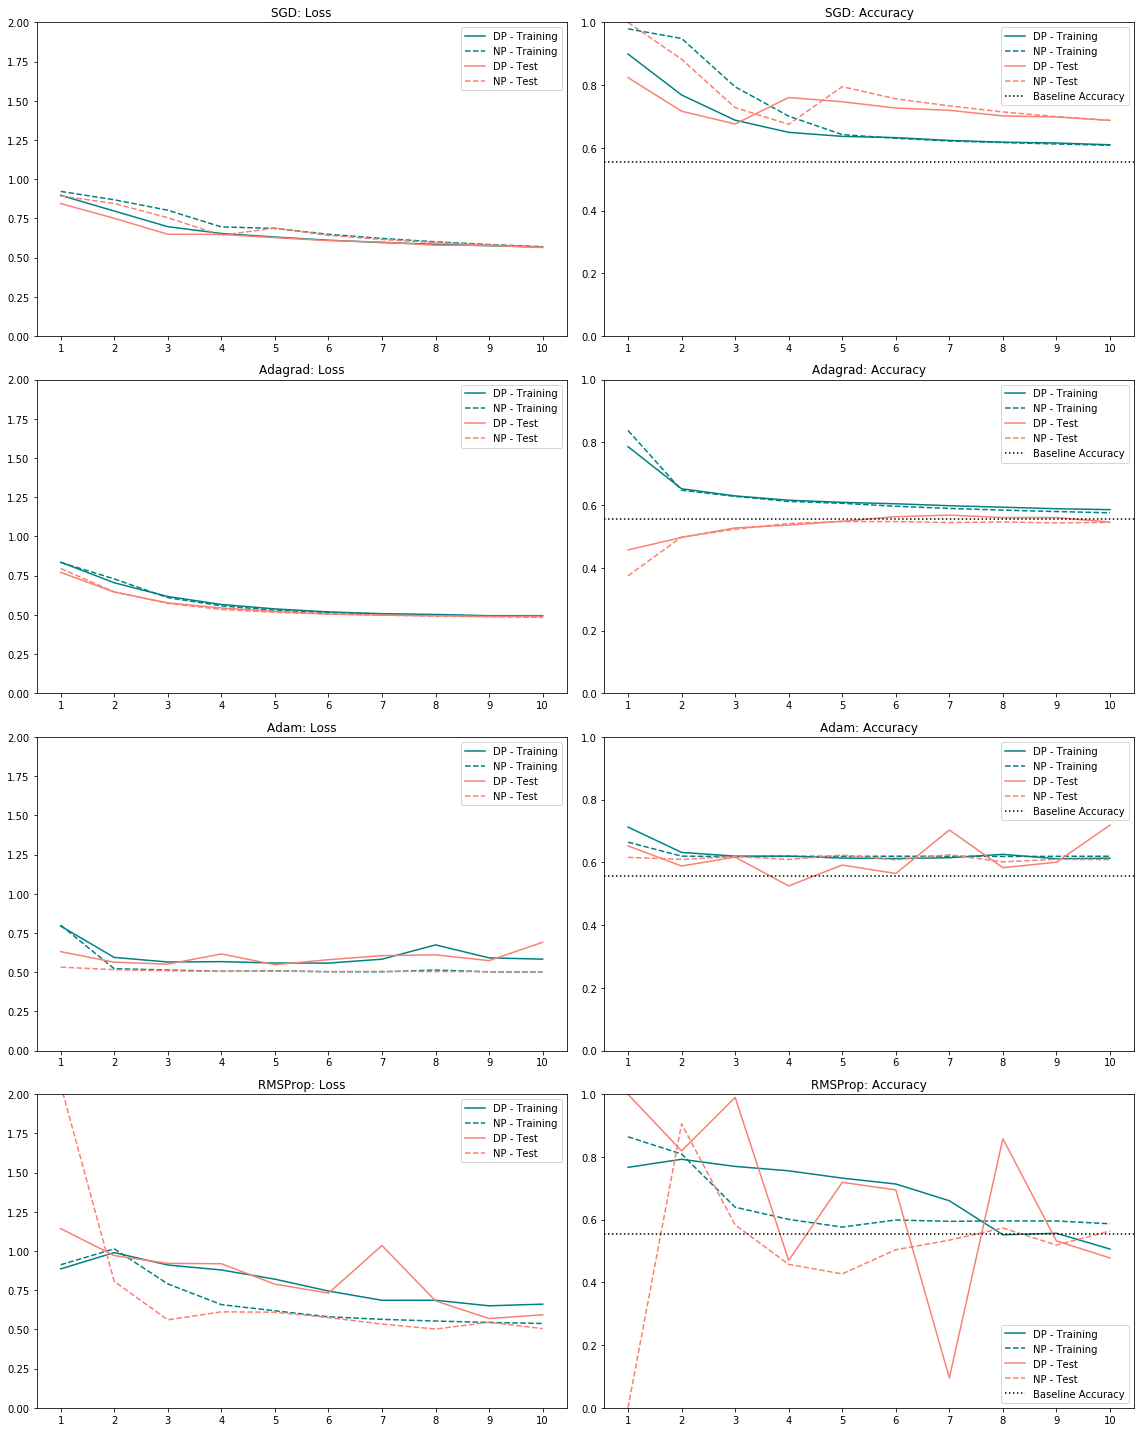

In [26]:
# get list of all metrics to plot
metrics_list = list((NP_models1['SGD']).keys())
# set up plots
fig, ax = plt.subplots(4,2, figsize = (16,20))
# loop through all optimizers
for key1, optimizer in enumerate(list_of_optimizers):
    #loop through all metrics
    for key2, metric in enumerate(metrics_list):
        # training loss
        if metric == 'loss':
            print(key1-1, metric, optimizer)
            ax[key1, 0].plot(DP_models1[optimizer][metric], label = 'DP - Training', c = 'teal')
            ax[key1, 0].plot(NP_models1[optimizer][metric], '--', label = 'NP - Training', c = 'teal')
            ax[key1, 0].set_title(optimizer + ': Loss')
        # val loss
        if metric == 'val_loss':
            ax[key1, 0].plot(DP_models1[optimizer][metric], label = 'DP - Test', c = 'salmon')
            ax[key1, 0].plot(NP_models1[optimizer][metric], '--', label = 'NP - Test', c = 'salmon')
            ax[key1, 0].legend()
            ax[key1, 0].set_xticks(range(0,10))
            ax[key1, 0].set_xticklabels(range(1,11))
            ax[key1, 0].set_ylim(0,2)

        # training accuracy
        if metric == 'acc':
            ax[key1, 1].plot(DP_models1[optimizer][metric], label = 'DP - Training', c = 'teal')
            ax[key1, 1].plot(NP_models1[optimizer][metric], '--', label = 'NP - Training', c = 'teal')
            ax[key1, 1].set_title(optimizer + ': Accuracy')

            # val accuracy
        if metric == 'val_acc':
            ax[key1, 1].plot(DP_models1[optimizer][metric], label = 'DP - Test', c = 'salmon')
            ax[key1, 1].plot(NP_models1[optimizer][metric], '--', label = 'NP - Test', c = 'salmon')
            ax[key1, 1].set_xticks(range(0,10))
            ax[key1, 1].set_xticklabels(range(1,11))
            ax[key1, 1].set_ylim(0,1)
            ax[key1, 1].axhline(, linestyle = ':', c = 'k', label = 'Baseline Accuracy')
            ax[key1, 1].legend()

plt.tight_layout()
plt.savefig('loss_acc', dpi=300,
        transparent=True, bbox_inches=None, pad_inches=0.001)

### 20 epochs, trial2

-1 loss SGD
0 loss Adagrad
1 loss Adam
2 loss RMSProp


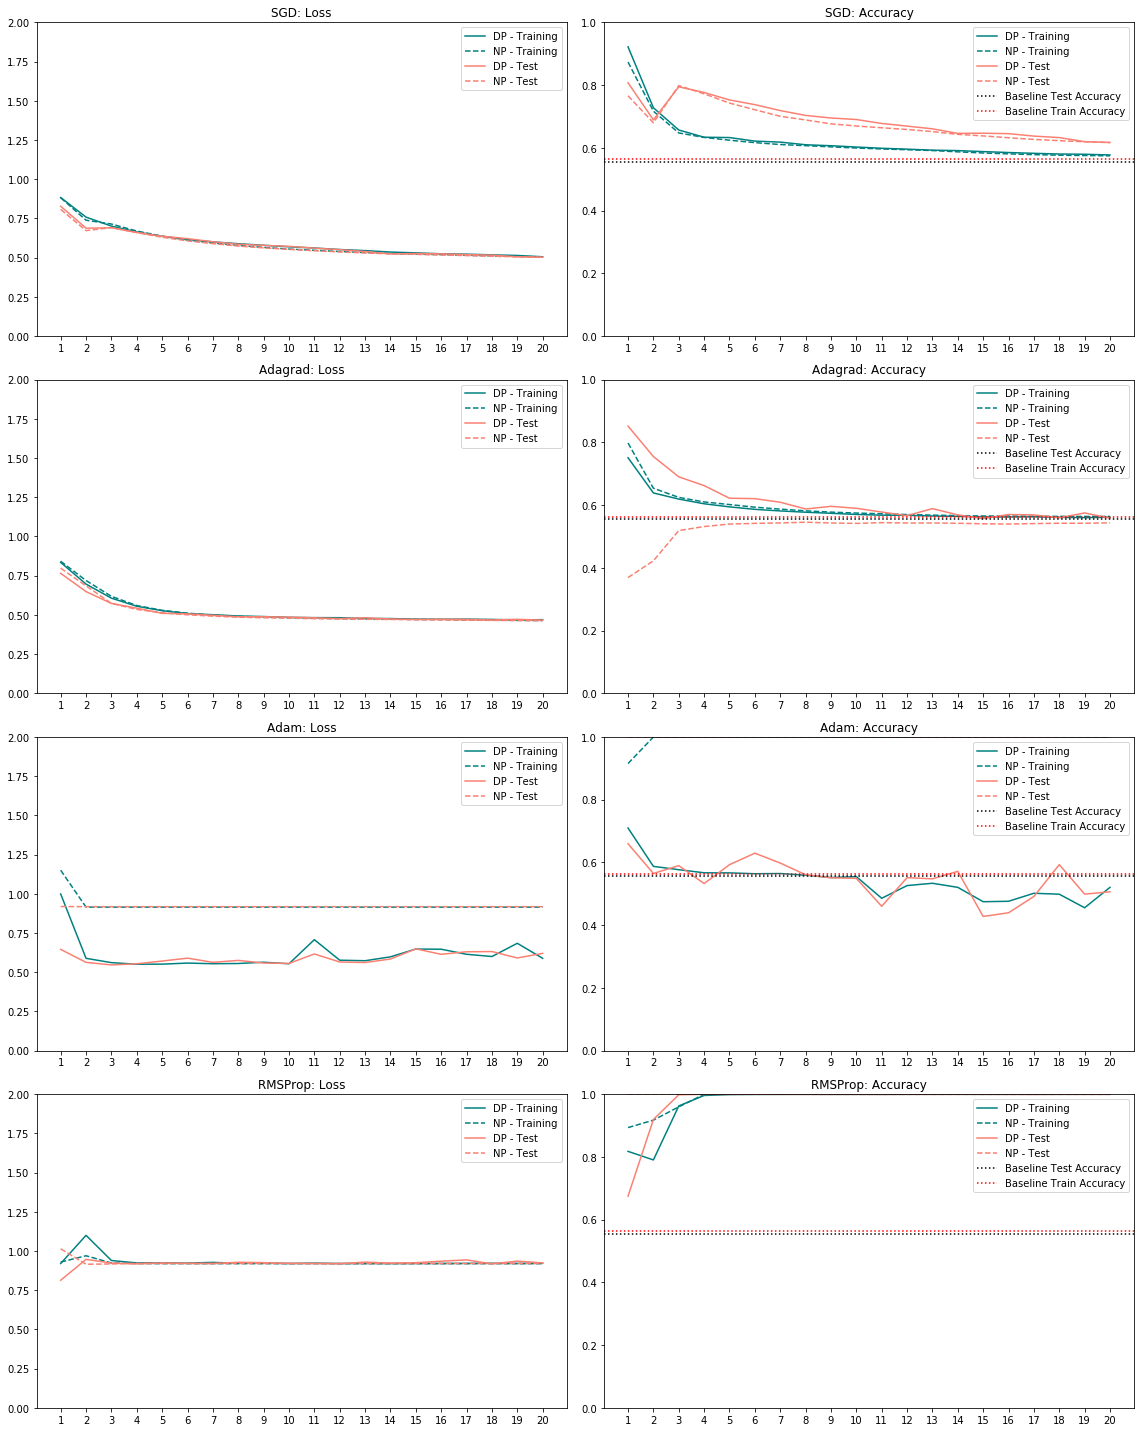

In [13]:
# get list of all metrics to plot
metrics_list = list((NP_models2['SGD']).keys())
# set up plots
fig, ax = plt.subplots(4,2, figsize = (16,20))
# loop through all optimizers
for key1, optimizer in enumerate(list_of_optimizers):
    #loop through all metrics
    for key2, metric in enumerate(metrics_list):
        # training loss
        if metric == 'loss':
            print(key1-1, metric, optimizer)
            ax[key1, 0].plot(DP_models2[optimizer][metric], label = 'DP - Training', c = 'teal')
            ax[key1, 0].plot(NP_models2[optimizer][metric], '--', label = 'NP - Training', c = 'teal')
            ax[key1, 0].set_title(optimizer + ': Loss')
        # val loss
        if metric == 'val_loss':
            ax[key1, 0].plot(DP_models2[optimizer][metric], label = 'DP - Test', c = 'salmon')
            ax[key1, 0].plot(NP_models2[optimizer][metric], '--', label = 'NP - Test', c = 'salmon')
            ax[key1, 0].legend()
            ax[key1, 0].set_xticks(range(0,20))
            ax[key1, 0].set_xticklabels(range(1,21))
            ax[key1, 0].set_ylim(0,2)

        # training accuracy
        if metric == 'acc':
            ax[key1, 1].plot(DP_models2[optimizer][metric], label = 'DP - Training', c = 'teal')
            ax[key1, 1].plot(NP_models2[optimizer][metric], '--', label = 'NP - Training', c = 'teal')
            ax[key1, 1].set_title(optimizer + ': Accuracy')

            # val accuracy
        if metric == 'val_acc':
            ax[key1, 1].plot(DP_models2[optimizer][metric], label = 'DP - Test', c = 'salmon')
            ax[key1, 1].plot(NP_models2[optimizer][metric], '--', label = 'NP - Test', c = 'salmon')
            ax[key1, 1].set_xticks(range(0,20))
            ax[key1, 1].set_xticklabels(range(1,21))
            ax[key1, 1].set_ylim(0,1)
            ax[key1, 1].axhline(baseline_te, linestyle = ':', c = 'k', label = 'Baseline Test Accuracy')
            ax[key1, 1].axhline(baseline_tr, linestyle = ':', c = 'r', label = 'Baseline Train Accuracy')
            ax[key1, 1].legend()

plt.tight_layout()
plt.savefig('loss_acc_20epochs', dpi=300,
        transparent=True, bbox_inches=None, pad_inches=0.001)

# Plots by Optimizer

In [128]:
def makeOptimizerPlots(optimizer = 'SGD', ylimlower = 0, ylimupper = 1):

    fig, ax = plt.subplots(2,2, figsize = (16,10))

    metrics = ['loss', 'acc']
    ylabz = ['Categorical Crossentropy Loss', 'Classification Accuracy']
    data_type = ['', 'val_']
    plot_titlez = ['Training Loss', 'Validation Loss', 'Training Accuracy', 'Validation Accuracy' ]

    counter = 0
    for key1, metric_ in enumerate(metrics):
        for key2, dtype in enumerate(data_type):

            # plot baseline and set ylimits
            if metric_ == 'acc':
                ax[key2, key1].set_ylim(ylimlower, ylimupper)
                if dtype == '':
                    ax[key2,key1].axhline(baseline_tr, linestyle = ':', c = 'k', label = 'Baseline Train Accuracy')
                if dtype == 'val_':
                    ax[key2,key1].axhline(baseline_te, linestyle = ':', c = 'k', label = 'Baseline Test Accuracy')

            # plot NP
            ax[key2, key1].plot(NP_models2[optimizer][dtype + metric_], '--', c = 'teal', label = 'NP trials', alpha = 0.2)
            ax[key2, key1].plot(NP_models3[optimizer][dtype + metric_], '--', c = 'teal', alpha = 0.2)
            ax[key2, key1].plot(NP_models4[optimizer][dtype + metric_], '--', c = 'teal', alpha = 0.2)

            mean_metric_NP = []
            for mod1, mod2, mod3 in zip(NP_models2[optimizer][dtype + metric_],NP_models3[optimizer][dtype + metric_] ,NP_models4[optimizer][dtype + metric_]):
                mean_metric_NP.append(np.mean([mod1,mod2, mod3]))

            ax[key2, key1].plot(mean_metric_NP, '--', c = 'teal', alpha = 1, label = 'NP - mean')
            ax[key2, key1].set_ylabel(ylabz[key1])

            # plot DP 
            ax[key2, key1].plot(DP_models2[optimizer][dtype + metric_], c = 'salmon', label = 'DP trials', alpha = 0.2)
            ax[key2, key1].plot(DP_models3[optimizer][dtype + metric_], c = 'salmon', alpha = 0.2 )
            ax[key2, key1].plot(DP_models4[optimizer][dtype + metric_], c = 'salmon', alpha = 0.2 )
            mean_metric_DP = []
            for mod1, mod2, mod3 in zip(DP_models2[optimizer][dtype + metric_],DP_models3[optimizer][dtype + metric_],DP_models4[optimizer][dtype + metric_]):
                mean_metric_DP.append(np.mean([mod1,mod2, mod3]))

            ax[key2, key1].plot(mean_metric_DP,  c = 'salmon', alpha = 1, label = 'DP - mean')

            ax[key2, key1].set_title(plot_titlez[counter])
            ax[key2, key1].set_xticks(range(0,20))
            ax[key2, key1].set_xticklabels(range(1,21))
            ax[key2, key1].set_xlabel('Epoch')
            if optimizer == 'Adam' and key2 == 1 and key1 == 0:
                ax[key2, key1].legend(loc = 'upper right')
            else:
                ax[key2, key1].legend()
            counter += 1


#     plt.suptitle(optimizer +' Optimizer - 2 trials', fontsize = 20)
    plt.tight_layout(pad = 4)

    plt.savefig(optimizer +'_20epochs', dpi=300,
            transparent=True, bbox_inches=None, pad_inches=0.001)
    plt.show()
    return

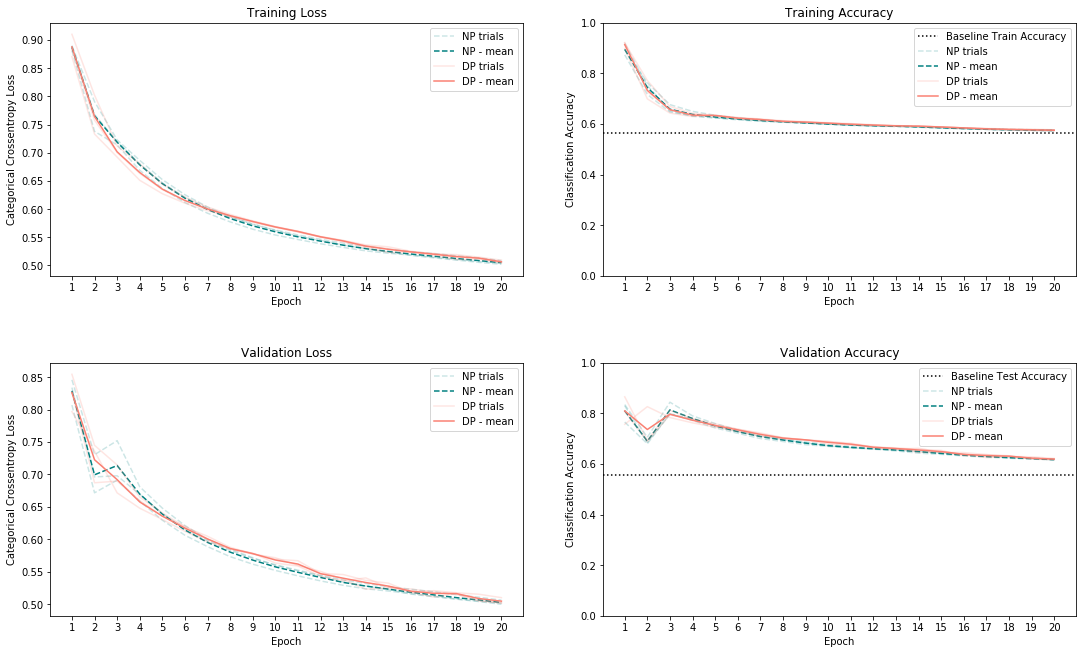

In [129]:
makeOptimizerPlots(optimizer='SGD')

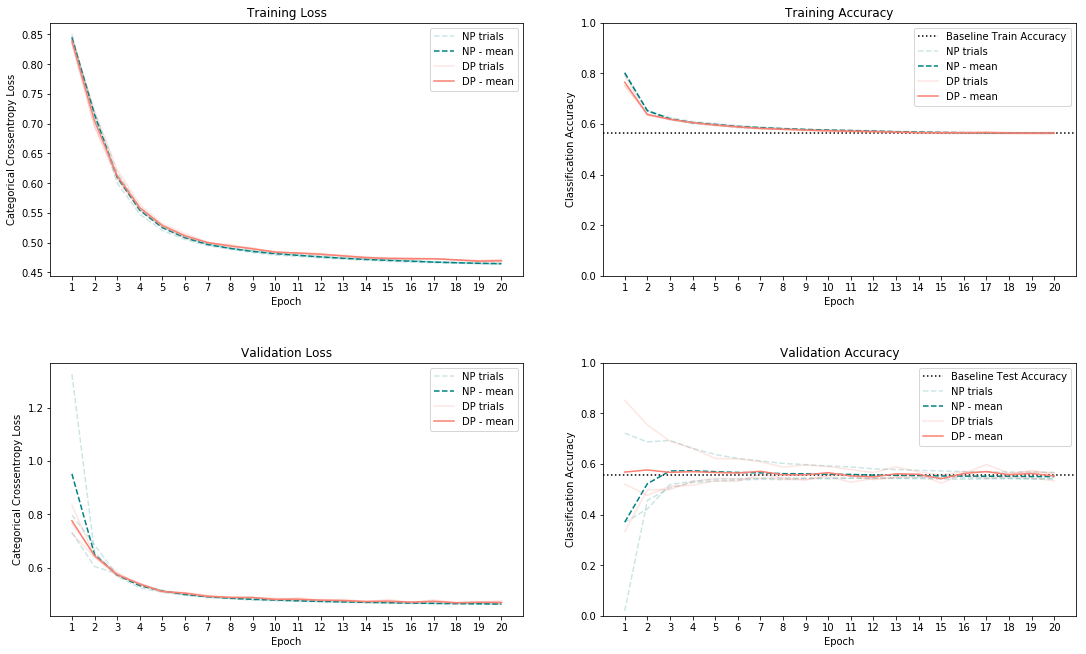

In [130]:
makeOptimizerPlots(optimizer='Adagrad')

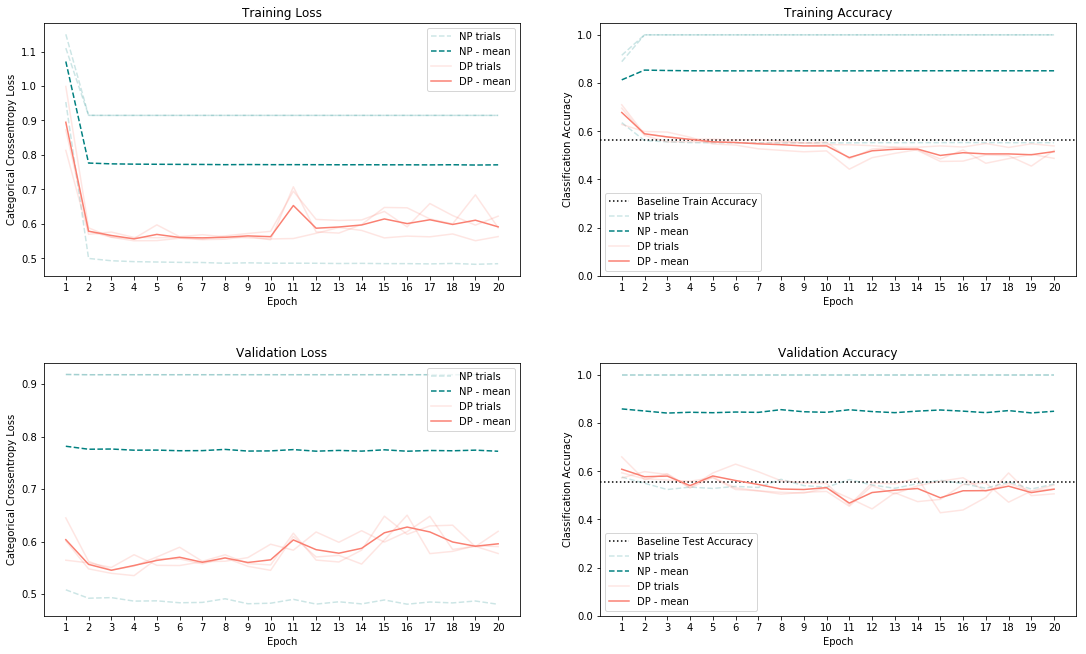

In [131]:
makeOptimizerPlots(optimizer='Adam',ylimlower=0, ylimupper=1.05)

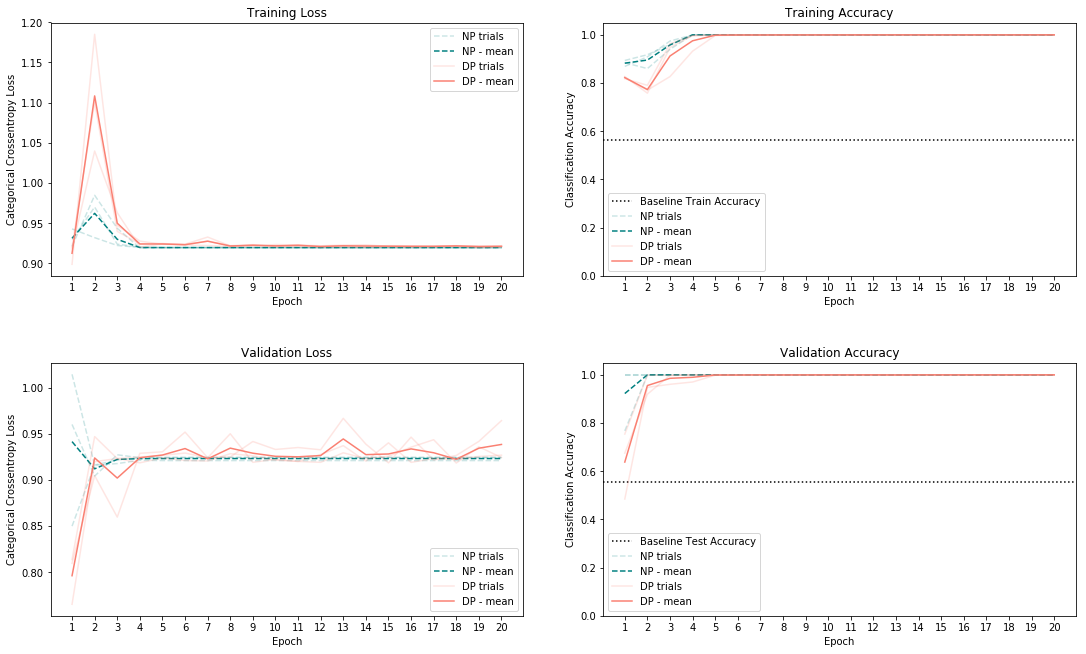

In [132]:
makeOptimizerPlots(optimizer='RMSProp',ylimlower=0, ylimupper=1.05)

# Training time analysis

In [77]:
training_time_NP = {} # in s/step
training_time_DP = {} # in s/step

In [78]:
training_time_NP['SGD'] = [0.217, 0.183, 0.201, 0.193, 0.203, 0.189, 0.212, 0.221 , 0.217, 0.207, 0.205, 0.202, 0.196, 0.192, 0.2150, 0.205]
training_time_NP['Adagrad'] = [.169, .161, .162, .159, 0.160, 0.158, 0.159, 0.158, 0.159, 0.161, .160]
training_time_NP['RMSProp'] = [.159, .156, .156, .156, .156, .157, .157, .159, .163, .159]
training_time_NP['Adam'] = [.172, .165, .2,.181, .170, .162, .162, .176, .168, .169]

In [79]:
training_time_DP['SGD'] = [10,10,10,10,11,14,13,11,11,11,10,12, 10,11,12,11,11,11,10,13]
training_time_DP['Adam'] = [10, 10, 10, 10, 11, 11, 11, 11, 9,10, 10, 10, 10, 11, 11, 11, 11, 9,10,10]
training_time_DP['Adagrad'] = [10,10,10, 10,10,10, 10,10,10, 10,10,10, 10, 9, 9, 11,9,9,9,11]
training_time_DP['RMSProp'] = [9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,10]

In [80]:
# make arrays with averages
avg_time_DP = training_time_DP.copy()
avg_time_NP = training_time_NP.copy()
for opt in training_time_DP:
    avg_time_DP[opt] = np.mean(training_time_DP[opt])
    avg_time_NP[opt] = np.mean(training_time_NP[opt])

''

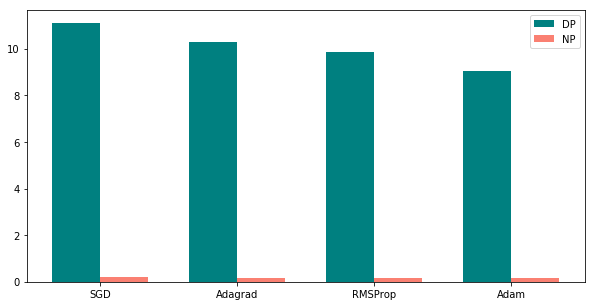

In [82]:
fig, ax = plt.subplots(figsize = (10,5))
ind = np.arange(4)
width = 0.35 
ax.bar(ind, avg_time_DP.values(), width, label = 'DP', color = 'teal')
ax.bar(ind+width, avg_time_NP.values(), width, label = 'NP', color = 'salmon')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(avg_time_NP.keys())
ax.legend()
;


In [83]:
time_results = pd.DataFrame({'Optimizer' : list(avg_time_DP.keys()),
              'Training_time_DP_sec_per_step' : list(avg_time_DP.values()),  
              'Training_time_NP_sec_per_step' : list(avg_time_NP.values())})

In [84]:
time_results['Multiplier'] = time_results.Training_time_DP_sec_per_step/time_results.Training_time_NP_sec_per_step

In [85]:
time_results

,Optimizer,Training_time_DP_sec_per_step,Training_time_NP_sec_per_step,Multiplier
0,SGD,11.10,0.203625,54.511971
1,Adam,10.30,0.160545,64.156285
2,Adagrad,9.85,0.157800,62.420786
3,RMSProp,9.05,0.172500,52.463768


In [86]:
time_results.mean(axis  = 0)

Training_time_DP_sec_per_step    10.075000
Training_time_NP_sec_per_step     0.173618
Multiplier                       58.388202
dtype: float64

---
# Output from running all models

# NP SGD

```python
(208proj) Lipikas-MacBook-Pro:~/Documents/Harvard/CS208/privacy/tutorials$ python keras_edx_DPSGD.py

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials
256
W0510 15:14:31.282170 4665554368 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 15:14:31.333914 4665554368 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
2019-05-10 15:14:31.485281: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 9s 172ms/step - loss: 0.9217 - acc: 0.9794 - val_loss: 0.8929 - val_acc: 0.9999
Epoch 2/10
50/50 [==============================] - 8s 168ms/step - loss: 0.8684 - acc: 0.9488 - val_loss: 0.8446 - val_acc: 0.8825
Epoch 3/10
50/50 [==============================] - 8s 166ms/step - loss: 0.8017 - acc: 0.7945 - val_loss: 0.7541 - val_acc: 0.7282
Epoch 4/10
50/50 [==============================] - 8s 164ms/step - loss: 0.6953 - acc: 0.7009 - val_loss: 0.6423 - val_acc: 0.6750
Epoch 5/10
50/50 [==============================] - 8s 166ms/step - loss: 0.6859 - acc: 0.6421 - val_loss: 0.6880 - val_acc: 0.7950
Epoch 6/10
50/50 [==============================] - 8s 163ms/step - loss: 0.6483 - acc: 0.6304 - val_loss: 0.6415 - val_acc: 0.7561
Epoch 7/10
50/50 [==============================] - 8s 161ms/step - loss: 0.6217 - acc: 0.6217 - val_loss: 0.6152 - val_acc: 0.7338
Epoch 8/10
50/50 [==============================] - 8s 162ms/step - loss: 0.6002 - acc: 0.6168 - val_loss: 0.5952 - val_acc: 0.7144
Epoch 9/10
50/50 [==============================] - 8s 160ms/step - loss: 0.5830 - acc: 0.6121 - val_loss: 0.5795 - val_acc: 0.6994
Epoch 10/10
50/50 [==============================] - 8s 161ms/step - loss: 0.5690 - acc: 0.6080 - val_loss: 0.5655 - val_acc: 0.6875
Trained with vanilla non-private SGD optimizer

saved history

W0510 15:15:53.754792 4665554368 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).

```

## RUN 2

```python

(208proj) Lipikas-MacBook-Pro:~/Documents/Harvard/CS208/privacy/tutorials$ python keras_edx_DPSGD.py
/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

256
W0515 17:05:43.202358 4552324544 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0515 17:05:43.280809 4552324544 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
2019-05-15 17:05:43.874449: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/20
50/50 [==============================] - 13s 265ms/step - loss: 0.8815 - acc: 0.8735 - val_loss: 0.8070 - val_acc: 0.7659
Epoch 2/20
50/50 [==============================] - 10s 201ms/step - loss: 0.7380 - acc: 0.7169 - val_loss: 0.6717 - val_acc: 0.6799
Epoch 3/20
50/50 [==============================] - 10s 205ms/step - loss: 0.7137 - acc: 0.6474 - val_loss: 0.6912 - val_acc: 0.7984
Epoch 4/20
50/50 [==============================] - 10s 205ms/step - loss: 0.6689 - acc: 0.6330 - val_loss: 0.6588 - val_acc: 0.7721
Epoch 5/20
50/50 [==============================] - 10s 192ms/step - loss: 0.6366 - acc: 0.6242 - val_loss: 0.6294 - val_acc: 0.7426
Epoch 6/20
50/50 [==============================] - 11s 215ms/step - loss: 0.6118 - acc: 0.6165 - val_loss: 0.6062 - val_acc: 0.7214
Epoch 7/20
50/50 [==============================] - 10s 192ms/step - loss: 0.5927 - acc: 0.6105 - val_loss: 0.5886 - val_acc: 0.7006
Epoch 8/20
50/50 [==============================] - 10s 196ms/step - loss: 0.5774 - acc: 0.6068 - val_loss: 0.5732 - val_acc: 0.6889
Epoch 9/20
50/50 [==============================] - 10s 202ms/step - loss: 0.5644 - acc: 0.6030 - val_loss: 0.5616 - val_acc: 0.6764
Epoch 10/20
50/50 [==============================] - 10s 205ms/step - loss: 0.5541 - acc: 0.5993 - val_loss: 0.5520 - val_acc: 0.6696
Epoch 11/20
50/50 [==============================] - 10s 207ms/step - loss: 0.5461 - acc: 0.5963 - val_loss: 0.5436 - val_acc: 0.6639
Epoch 12/20
50/50 [==============================] - 11s 217ms/step - loss: 0.5385 - acc: 0.5938 - val_loss: 0.5358 - val_acc: 0.6584
Epoch 13/20
50/50 [==============================] - 11s 221ms/step - loss: 0.5321 - acc: 0.5912 - val_loss: 0.5290 - val_acc: 0.6517
Epoch 14/20
50/50 [==============================] - 11s 212ms/step - loss: 0.5259 - acc: 0.5871 - val_loss: 0.5236 - val_acc: 0.6429
Epoch 15/20
50/50 [==============================] - 9s 189ms/step - loss: 0.5217 - acc: 0.5834 - val_loss: 0.5202 - val_acc: 0.6379
Epoch 16/20
50/50 [==============================] - 10s 203ms/step - loss: 0.5185 - acc: 0.5807 - val_loss: 0.5163 - val_acc: 0.6321
Epoch 17/20
50/50 [==============================] - 10s 193ms/step - loss: 0.5146 - acc: 0.5782 - val_loss: 0.5123 - val_acc: 0.6268
Epoch 18/20
50/50 [==============================] - 10s 201ms/step - loss: 0.5106 - acc: 0.5764 - val_loss: 0.5079 - val_acc: 0.6227
Epoch 19/20
50/50 [==============================] - 9s 183ms/step - loss: 0.5071 - acc: 0.5754 - val_loss: 0.5046 - val_acc: 0.6193
Epoch 20/20
50/50 [==============================] - 11s 217ms/step - loss: 0.5041 - acc: 0.5744 - val_loss: 0.5015 - val_acc: 0.6166
Trained with vanilla non-private SGD optimizer

saved history

W0515 17:09:10.076479 4552324544 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).

```

### NP Adagrad

```
(208proj) Lipikas-MacBook-Pro:~/documents/harvard/cs208/privacy/tutorials$ python keras_edx_DPAdaGrad.py
/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W0510 15:20:20.495493 4598191552 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 15:20:20.545544 4598191552 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
2019-05-10 15:20:20.717177: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 8s 167ms/step - loss: 0.8343 - acc: 0.8380 - val_loss: 0.7953 - val_acc: 0.3743
Epoch 2/10
50/50 [==============================] - 8s 161ms/step - loss: 0.7292 - acc: 0.6475 - val_loss: 0.6463 - val_acc: 0.4982
Epoch 3/10
50/50 [==============================] - 8s 160ms/step - loss: 0.6094 - acc: 0.6278 - val_loss: 0.5731 - val_acc: 0.5228
Epoch 4/10
50/50 [==============================] - 8s 161ms/step - loss: 0.5574 - acc: 0.6118 - val_loss: 0.5344 - val_acc: 0.5414
Epoch 5/10
50/50 [==============================] - 8s 160ms/step - loss: 0.5293 - acc: 0.6057 - val_loss: 0.5162 - val_acc: 0.5475
Epoch 6/10
50/50 [==============================] - 8s 169ms/step - loss: 0.5148 - acc: 0.5962 - val_loss: 0.5053 - val_acc: 0.5475
Epoch 7/10
50/50 [==============================] - 9s 181ms/step - loss: 0.5055 - acc: 0.5894 - val_loss: 0.4982 - val_acc: 0.5444
Epoch 8/10
50/50 [==============================] - 8s 160ms/step - loss: 0.4979 - acc: 0.5840 - val_loss: 0.4914 - val_acc: 0.5461
Epoch 9/10
50/50 [==============================] - 9s 174ms/step - loss: 0.4928 - acc: 0.5795 - val_loss: 0.4879 - val_acc: 0.5432
Epoch 10/10
50/50 [==============================] - 9s 181ms/step - loss: 0.4885 - acc: 0.5754 - val_loss: 0.4837 - val_acc: 0.5449
Trained with vanilla non-private Adagrad optimizer
W0510 15:21:44.531737 4598191552 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
Trained with vanilla non-private Adagrad optimizer

saved history

W0510 15:21:44.553280 4598191552 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

## RUN 2

```python
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense_3 (Dense)              (None, 50)                2600
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
Epoch 1/20
50/50 [==============================] - 8s 169ms/step - loss: 0.8417 - acc: 0.7981 - val_loss: 0.7976 - val_acc: 0.3688
Epoch 2/20
50/50 [==============================] - 8s 161ms/step - loss: 0.7189 - acc: 0.6538 - val_loss: 0.6848 - val_acc: 0.4223
Epoch 3/20
50/50 [==============================] - 8s 162ms/step - loss: 0.6179 - acc: 0.6246 - val_loss: 0.5731 - val_acc: 0.5187
Epoch 4/20
50/50 [==============================] - 8s 159ms/step - loss: 0.5593 - acc: 0.6100 - val_loss: 0.5345 - val_acc: 0.5315
Epoch 5/20
50/50 [==============================] - 8s 160ms/step - loss: 0.5287 - acc: 0.6017 - val_loss: 0.5131 - val_acc: 0.5396
Epoch 6/20
50/50 [==============================] - 8s 159ms/step - loss: 0.5106 - acc: 0.5933 - val_loss: 0.5003 - val_acc: 0.5417
Epoch 7/20
50/50 [==============================] - 8s 159ms/step - loss: 0.4983 - acc: 0.5871 - val_loss: 0.4915 - val_acc: 0.5432
Epoch 8/20
50/50 [==============================] - 8s 159ms/step - loss: 0.4906 - acc: 0.5817 - val_loss: 0.4848 - val_acc: 0.5454
Epoch 9/20
50/50 [==============================] - 8s 161ms/step - loss: 0.4857 - acc: 0.5776 - val_loss: 0.4814 - val_acc: 0.5430
Epoch 10/20
50/50 [==============================] - 8s 159ms/step - loss: 0.4816 - acc: 0.5746 - val_loss: 0.4788 - val_acc: 0.5416
Epoch 11/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4786 - acc: 0.5724 - val_loss: 0.4753 - val_acc: 0.5441
Epoch 12/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4757 - acc: 0.5699 - val_loss: 0.4736 - val_acc: 0.5429
Epoch 13/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4739 - acc: 0.5680 - val_loss: 0.4717 - val_acc: 0.5429
Epoch 14/20
50/50 [==============================] - 8s 159ms/step - loss: 0.4721 - acc: 0.5664 - val_loss: 0.4702 - val_acc: 0.5420
Epoch 15/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4706 - acc: 0.5652 - val_loss: 0.4690 - val_acc: 0.5404
Epoch 16/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4697 - acc: 0.5651 - val_loss: 0.4677 - val_acc: 0.5396
Epoch 17/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4673 - acc: 0.5644 - val_loss: 0.4659 - val_acc: 0.5411
Epoch 18/20
50/50 [==============================] - 8s 159ms/step - loss: 0.4660 - acc: 0.5640 - val_loss: 0.4645 - val_acc: 0.5421
Epoch 19/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4645 - acc: 0.5638 - val_loss: 0.4637 - val_acc: 0.5421
Epoch 20/20
50/50 [==============================] - 8s 158ms/step - loss: 0.4634 - acc: 0.5638 - val_loss: 0.4626 - val_acc: 0.5434
Trained with vanilla non-private Adagrad optimizer
W0514 23:34:42.596328 4734268864 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
Trained with vanilla non-private Adagrad optimizer

saved history
```

### NP RMSProp

```python
(208proj) Lipikas-MacBook-Pro:~/Documents/Harvard/CS208/privacy/tutorials$ python keras_edx_DPRMSProp.py

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

 TRAINING DATA SIZE CHECK


  (146473, 51)

W0510 02:53:55.314500 4604286400 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 02:53:55.359926 4604286400 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
2019-05-10 02:53:55.590159: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 8s 159ms/step - loss: 0.9125 - acc: 0.8643 - val_loss: 2.0597 - val_acc: 0.0000e+00
Epoch 2/10
50/50 [==============================] - 8s 156ms/step - loss: 1.0139 - acc: 0.8095 - val_loss: 0.8064 - val_acc: 0.9058
Epoch 3/10
50/50 [==============================] - 8s 156ms/step - loss: 0.7905 - acc: 0.6399 - val_loss: 0.5611 - val_acc: 0.5834
Epoch 4/10
50/50 [==============================] - 8s 156ms/step - loss: 0.6583 - acc: 0.6011 - val_loss: 0.6121 - val_acc: 0.4576
Epoch 5/10
50/50 [==============================] - 8s 156ms/step - loss: 0.6189 - acc: 0.5765 - val_loss: 0.6098 - val_acc: 0.4272
Epoch 6/10
50/50 [==============================] - 8s 157ms/step - loss: 0.5806 - acc: 0.5991 - val_loss: 0.5754 - val_acc: 0.5041
Epoch 7/10
50/50 [==============================] - 8s 157ms/step - loss: 0.5643 - acc: 0.5948 - val_loss: 0.5343 - val_acc: 0.5347
Epoch 8/10
50/50 [==============================] - 8s 159ms/step - loss: 0.5535 - acc: 0.5961 - val_loss: 0.5024 - val_acc: 0.5735
Epoch 9/10
50/50 [==============================] - 8s 163ms/step - loss: 0.5445 - acc: 0.5959 - val_loss: 0.5458 - val_acc: 0.5191
Epoch 10/10
50/50 [==============================] - 8s 159ms/step - loss: 0.5377 - acc: 0.5870 - val_loss: 0.5053 - val_acc: 0.5640
Trained with vanilla non-private RMSProp optimizer

saved history

W0510 02:55:14.530664 4604286400 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

## RUN 2

```python
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
2019-05-15 14:50:58.678748: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/20
50/50 [==============================] - 9s 173ms/step - loss: 0.9298 - acc: 0.8938 - val_loss: 1.0145 - val_acc: 1.0000
Epoch 2/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9700 - acc: 0.9176 - val_loss: 0.9158 - val_acc: 1.0000
Epoch 3/20
50/50 [==============================] - 8s 165ms/step - loss: 0.9238 - acc: 0.9599 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 4/20
50/50 [==============================] - 8s 168ms/step - loss: 0.9202 - acc: 1.0000 - val_loss: 0.9213 - val_acc: 1.0000
Epoch 5/20
50/50 [==============================] - 8s 164ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 6/20
50/50 [==============================] - 8s 165ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 7/20
50/50 [==============================] - 8s 164ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 8/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 9/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 10/20
50/50 [==============================] - 8s 164ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 11/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 12/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 13/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 14/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 15/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 16/20
50/50 [==============================] - 8s 161ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 17/20
50/50 [==============================] - 8s 164ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 18/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 19/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Epoch 20/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9195 - acc: 1.0000 - val_loss: 0.9209 - val_acc: 1.0000
Trained with vanilla non-private RMSProp optimizer

saved history

W0515 14:53:42.758501 4710585792 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).

```

In [72]:
training_time_NP['SGD'] = [0.217, 0.183, 0.201, 0.193, 0.203, 0.189, 0.212, 0.221 , 0.217, 0.207, 0.205, 0.202, 0.196, 0.192, 0.2150, 0.205]
training_time_NP['Adagrad'] = [.169, .161, .162, .159, 0.160, 0.158, 0.159, 0.158, 0.159, 0.161, .160]
training_time_NP['RMSProp'] = [.159, .156, .156, .156, .156, .157, .157, .159, .163, .159]
training_time_NP['Adam'] = [.173, .163, .163, 0.164, 0.161, 0.162, 0.164, 0.165, 0.163]

NameError: name 'training_time_NP' is not defined

### NP Adam

```python
(208proj) Lipikas-MacBook-Pro:~/documents/harvard/cs208/privacy/tutorials$ python keras_edx_DPAdam.py
/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Succeed
256




 inside load data and size is  (146432, 51) (146432, 1)




W0510 15:11:36.046627 4707526080 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 15:11:36.094340 4707526080 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
2019-05-10 15:11:36.309357: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 9s 172ms/step - loss: 0.7989 - acc: 0.6645 - val_loss: 0.5321 - val_acc: 0.6161
Epoch 2/10
50/50 [==============================] - 8s 165ms/step - loss: 0.5220 - acc: 0.6200 - val_loss: 0.5154 - val_acc: 0.6095
Epoch 3/10
50/50 [==============================] - 10s 200ms/step - loss: 0.5137 - acc: 0.6184 - val_loss: 0.5085 - val_acc: 0.6189
Epoch 4/10
50/50 [==============================] - 9s 181ms/step - loss: 0.5054 - acc: 0.6195 - val_loss: 0.5048 - val_acc: 0.6094
Epoch 5/10
50/50 [==============================] - 8s 170ms/step - loss: 0.5082 - acc: 0.6192 - val_loss: 0.5060 - val_acc: 0.6231
Epoch 6/10
50/50 [==============================] - 8s 162ms/step - loss: 0.5028 - acc: 0.6197 - val_loss: 0.5031 - val_acc: 0.6081
Epoch 7/10
50/50 [==============================] - 8s 162ms/step - loss: 0.5018 - acc: 0.6195 - val_loss: 0.5053 - val_acc: 0.6244
Epoch 8/10
50/50 [==============================] - 9s 176ms/step - loss: 0.5134 - acc: 0.6189 - val_loss: 0.5037 - val_acc: 0.6018
Epoch 9/10
50/50 [==============================] - 8s 168ms/step - loss: 0.5019 - acc: 0.6194 - val_loss: 0.5026 - val_acc: 0.6098
Epoch 10/10
50/50 [==============================] - 8s 169ms/step - loss: 0.5013 - acc: 0.6197 - val_loss: 0.5023 - val_acc: 0.6092
Trained with vanilla non-private Adam optimizer

saved history

W0510 15:13:02.672194 4707526080 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

## RUN 2

```python
256
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense_3 (Dense)              (None, 50)                2600
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
Epoch 1/20
50/50 [==============================] - 9s 173ms/step - loss: 1.1502 - acc: 0.9153 - val_loss: 0.9185 - val_acc: 1.0000
Epoch 2/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9147 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 3/20
50/50 [==============================] - 8s 165ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 4/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 5/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 6/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 7/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 8/20
50/50 [==============================] - 9s 172ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 9/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 10/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 11/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 12/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 13/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 14/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 15/20
50/50 [==============================] - 8s 162ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 16/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 17/20
50/50 [==============================] - 8s 164ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 18/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 19/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Epoch 20/20
50/50 [==============================] - 8s 163ms/step - loss: 0.9146 - acc: 1.0000 - val_loss: 0.9177 - val_acc: 1.0000
Trained with vanilla non-private Adam optimizer

saved history

W0515 14:56:28.330972 4710585792 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

### DP SGD

#### RUN 1

```python
(208proj) Lipikas-MacBook-Pro:~/Documents/Harvard/CS208/privacy/tutorials$ python keras_edx_DPSGD.py
WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials
256
W0510 03:51:04.389285 4733302208 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 03:51:04.708090 4733302208 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
W0510 03:51:05.508040 4733302208 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-10 03:51:06.312379: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 1504s 30s/step - loss: 0.8967 - acc: 0.8991 - val_loss: 0.8445 - val_acc: 0.8239
Epoch 2/10
50/50 [==============================] - 1495s 30s/step - loss: 0.7967 - acc: 0.7685 - val_loss: 0.7502 - val_acc: 0.7168
Epoch 3/10
50/50 [==============================] - 1510s 30s/step - loss: 0.6967 - acc: 0.6881 - val_loss: 0.6485 - val_acc: 0.6759
Epoch 4/10
50/50 [==============================] - 1493s 30s/step - loss: 0.6534 - acc: 0.6493 - val_loss: 0.6473 - val_acc: 0.7605
Epoch 5/10
50/50 [==============================] - 1482s 30s/step - loss: 0.6307 - acc: 0.6365 - val_loss: 0.6269 - val_acc: 0.7468
Epoch 6/10
50/50 [==============================] - 1479s 30s/step - loss: 0.6104 - acc: 0.6325 - val_loss: 0.6078 - val_acc: 0.7268
Epoch 7/10
50/50 [==============================] - 1483s 30s/step - loss: 0.5956 - acc: 0.6236 - val_loss: 0.5986 - val_acc: 0.7195
Epoch 8/10
50/50 [==============================] - 1502s 30s/step - loss: 0.5845 - acc: 0.6179 - val_loss: 0.5786 - val_acc: 0.7017
Epoch 9/10
50/50 [==============================] - 1500s 30s/step - loss: 0.5751 - acc: 0.6153 - val_loss: 0.5778 - val_acc: 0.6983
Epoch 10/10
50/50 [==============================] - 1041s 21s/step - loss: 0.5673 - acc: 0.6096 - val_loss: 0.5639 - val_acc: 0.6875
For delta=1e-5, the current epsilon is: 1.05

saved history DP

W0510 07:52:35.936686 4733302208 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

#### RUN 2

```python
(208proj) Lipikas-MacBook-Pro:~/Documents/Harvard/CS208/privacy/tutorials$ python keras_edx_DPSGD.py
/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

256
W0515 18:54:42.577327 4577744320 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0515 18:54:42.636884 4577744320 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
W0515 18:54:42.777392 4577744320 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-15 18:54:42.919435: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/20
50/50 [==============================] - 532s 11s/step - loss: 0.8705 - acc: 0.8983 - val_loss: 0.7970 - val_acc: 0.7569
Epoch 2/20
50/50 [==============================] - 528s 11s/step - loss: 0.7332 - acc: 0.6994 - val_loss: 0.7359 - val_acc: 0.8267
Epoch 3/20
16/50 [========>.....................] - ETA: 5:53 - loss: 0.7114 - acc: 0.6517
50/50 [==============================] - 506s 10s/step - loss: 0.6923 - acc: 0.6431 - val_loss: 0.6716 - val_acc: 0.7835
Epoch 4/20
50/50 [==============================] - 527s 11s/step - loss: 0.6511 - acc: 0.6294 - val_loss: 0.6479 - val_acc: 0.7627
Epoch 5/20
50/50 [==============================] - 562s 11s/step - loss: 0.6274 - acc: 0.6338 - val_loss: 0.6306 - val_acc: 0.7454
Epoch 6/20
50/50 [==============================] - 573s 11s/step - loss: 0.6105 - acc: 0.6227 - val_loss: 0.6123 - val_acc: 0.7289
Epoch 7/20
50/50 [==============================] - 583s 12s/step - loss: 0.5972 - acc: 0.6153 - val_loss: 0.5961 - val_acc: 0.7097
Epoch 8/20
50/50 [==============================] - 560s 11s/step - loss: 0.5864 - acc: 0.6094 - val_loss: 0.5852 - val_acc: 0.6995
Epoch 9/20
50/50 [==============================] - 591s 12s/step - loss: 0.5767 - acc: 0.6063 - val_loss: 0.5786 - val_acc: 0.6958
Epoch 10/20
50/50 [==============================] - 633s 13s/step - loss: 0.5675 - acc: 0.6028 - val_loss: 0.5633 - val_acc: 0.6789
Epoch 11/20
50/50 [==============================] - 685s 14s/step - loss: 0.5592 - acc: 0.5979 - val_loss: 0.5588 - val_acc: 0.6746
Epoch 12/20
39/50 [======================>.......] - ETA: 23:47 - loss: 0.5514 - acc: 0.5964


40/50 [=======================>......] - ETA: 21:07 - loss: 0.5512 - acc: 0.5943
41/50 [=======================>......] - ETA: 18:35 - loss: 0.5512 - acc: 0.5963
45/50 [==========================>...] - ETA: 9:29 - loss: 0.5510 - acc: 0.5960

50/50 [==============================] - 5181s 104s/step - loss: 0.5502 - acc: 0.5942 - val_loss: 0.5431 - val_acc: 0.6639
Epoch 13/20
50/50 [==============================] - 553s 11s/step - loss: 0.5419 - acc: 0.5923 - val_loss: 0.5360 - val_acc: 0.6588
Epoch 14/20
16/50 [========>.....................] - ETA: 26:38:18 - loss: 0.5340 - acc: 0.5917

50/50 [==============================] - 45549s 911s/step - loss: 0.5317 - acc: 0.5915 - val_loss: 0.5404 - val_acc: 0.6620
Epoch 15/20
50/50 [==============================] - 542s 11s/step - loss: 0.5232 - acc: 0.5878 - val_loss: 0.5258 - val_acc: 0.6469
Epoch 16/20
50/50 [==============================] - 501s 10s/step - loss: 0.5233 - acc: 0.5845 - val_loss: 0.5184 - val_acc: 0.6374
Epoch 17/20
50/50 [==============================] - 493s 10s/step - loss: 0.5186 - acc: 0.5815 - val_loss: 0.5108 - val_acc: 0.6252
Epoch 18/20
50/50 [==============================] - 479s 10s/step - loss: 0.5108 - acc: 0.5784 - val_loss: 0.5162 - val_acc: 0.6303
Epoch 19/20
50/50 [==============================] - 478s 10s/step - loss: 0.5112 - acc: 0.5774 - val_loss: 0.5058 - val_acc: 0.6219
Epoch 20/20
50/50 [==============================] - 476s 10s/step - loss: 0.5055 - acc: 0.5766 - val_loss: 0.5017 - val_acc: 0.6193
For delta=1e-5, the current epsilon is: 1.03

saved history DP

W0516 11:43:34.239864 4577744320 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

### DP Adagrad

#### RUN 1

```python
(208proj) Lipikas-MacBook-Pro:~/documents/harvard/cs208/privacy/tutorials$ python keras_edx_DPAdaGrad.py
/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W0510 03:42:44.107494 4394055104 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 03:42:44.164857 4394055104 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
W0510 03:42:44.300239 4394055104 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-10 03:42:44.438097: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 777s 16s/step - loss: 0.8359 - acc: 0.7863 - val_loss: 0.7711 - val_acc: 0.4569
Epoch 2/10
50/50 [==============================] - 1477s 30s/step - loss: 0.7046 - acc: 0.6521 - val_loss: 0.6454 - val_acc: 0.4969
Epoch 3/10
50/50 [==============================] - 1509s 30s/step - loss: 0.6169 - acc: 0.6293 - val_loss: 0.5762 - val_acc: 0.5272
Epoch 4/10
50/50 [==============================] - 1505s 30s/step - loss: 0.5662 - acc: 0.6156 - val_loss: 0.5435 - val_acc: 0.5361
Epoch 5/10
50/50 [==============================] - 1491s 30s/step - loss: 0.5377 - acc: 0.6088 - val_loss: 0.5217 - val_acc: 0.5486
Epoch 6/10
50/50 [==============================] - 1486s 30s/step - loss: 0.5185 - acc: 0.6042 - val_loss: 0.5051 - val_acc: 0.5630
Epoch 7/10
50/50 [==============================] - 1480s 30s/step - loss: 0.5073 - acc: 0.5981 - val_loss: 0.4976 - val_acc: 0.5680
Epoch 8/10
50/50 [==============================] - 1493s 30s/step - loss: 0.5024 - acc: 0.5932 - val_loss: 0.4942 - val_acc: 0.5602
Epoch 9/10
50/50 [==============================] - 1501s 30s/step - loss: 0.4945 - acc: 0.5885 - val_loss: 0.4894 - val_acc: 0.5601
Epoch 10/10
50/50 [==============================] - 1497s 30s/step - loss: 0.4947 - acc: 0.5855 - val_loss: 0.4903 - val_acc: 0.5459
For delta=1e-5, the current epsilon is: 1.05
W0510 07:39:41.755584 4394055104 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
For delta=1e-5, the current epsilon is: 1.05

saved history DP

W0510 07:39:41.973755 4394055104 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model

```


#### RUN 2
```python
(208proj) Lipikas-MacBook-Pro:~/Documents/Harvard/CS208/privacy/tutorials$ python keras_edx_DPAdaGrad.py /Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W0515 11:45:05.146042 4552230336 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0515 11:45:05.206583 4552230336 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
steps per epoch  572
W0515 11:45:05.342643 4552230336 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-15 11:45:05.493837: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/20
50/50 [==============================] - 490s 10s/step - loss: 0.8345 - acc: 0.7511 - val_loss: 0.7646 - val_acc: 0.8520
Epoch 2/20
50/50 [==============================] - 541s 11s/step - loss: 0.6961 - acc: 0.6388 - val_loss: 0.6481 - val_acc: 0.7549
Epoch 3/20
50/50 [==============================] - 526s 11s/step - loss: 0.6063 - acc: 0.6192 - val_loss: 0.5727 - val_acc: 0.6902
Epoch 4/20
50/50 [==============================] - 489s 10s/step - loss: 0.5546 - acc: 0.6042 - val_loss: 0.5423 - val_acc: 0.6621
Epoch 5/20
50/50 [==============================] - 565s 11s/step - loss: 0.5262 - acc: 0.5943 - val_loss: 0.5096 - val_acc: 0.6219
Epoch 6/20
50/50 [==============================] - 506s 10s/step - loss: 0.5079 - acc: 0.5865 - val_loss: 0.5063 - val_acc: 0.6206
Epoch 7/20
50/50 [==============================] - 498s 10s/step - loss: 0.5007 - acc: 0.5814 - val_loss: 0.4969 - val_acc: 0.6092
Epoch 8/20
50/50 [==============================] - 505s 10s/step - loss: 0.4926 - acc: 0.5773 - val_loss: 0.4875 - val_acc: 0.5876
Epoch 9/20
50/50 [==============================] - 483s 10s/step - loss: 0.4890 - acc: 0.5738 - val_loss: 0.4880 - val_acc: 0.5961
Epoch 10/20
50/50 [==============================] - 474s 9s/step - loss: 0.4839 - acc: 0.5702 - val_loss: 0.4852 - val_acc: 0.5899
Epoch 11/20
50/50 [==============================] - 473s 9s/step - loss: 0.4822 - acc: 0.5679 - val_loss: 0.4809 - val_acc: 0.5779
Epoch 12/20
50/50 [==============================] - 476s 10s/step - loss: 0.4816 - acc: 0.5673 - val_loss: 0.4759 - val_acc: 0.5664
Epoch 13/20
50/50 [==============================] - 489s 10s/step - loss: 0.4767 - acc: 0.5652 - val_loss: 0.4812 - val_acc: 0.5887
Epoch 14/20
50/50 [==============================] - 477s 10s/step - loss: 0.4764 - acc: 0.5640 - val_loss: 0.4735 - val_acc: 0.5688
Epoch 15/20
50/50 [==============================] - 476s 10s/step - loss: 0.4723 - acc: 0.5621 - val_loss: 0.4704 - val_acc: 0.5569
Epoch 16/20
50/50 [==============================] - 470s 9s/step - loss: 0.4717 - acc: 0.5620 - val_loss: 0.4716 - val_acc: 0.5701
Epoch 17/20
50/50 [==============================] - 481s 10s/step - loss: 0.4727 - acc: 0.5626 - val_loss: 0.4707 - val_acc: 0.5687
Epoch 18/20
50/50 [==============================] - 481s 10s/step - loss: 0.4706 - acc: 0.5609 - val_loss: 0.4672 - val_acc: 0.5595
Epoch 19/20
50/50 [==============================] - 477s 10s/step - loss: 0.4677 - acc: 0.5601 - val_loss: 0.4714 - val_acc: 0.5750
Epoch 20/20
50/50 [==============================] - 468s 9s/step - loss: 0.4692 - acc: 0.5613 - val_loss: 0.4663 - val_acc: 0.5583
For delta=1e-5, the current epsilon is: 1.03
W0515 14:29:11.672291 4552230336 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
For delta=1e-5, the current epsilon is: 1.03

saved history DP

W0515 14:29:11.724388 4552230336 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```


### DP RMSProp

#### RUN 1

```python
(208proj) Lipikas-MacBook-Pro:~/Documents/harvard/cs208/privacy/tutorials$ python keras_edx_DPRMSProp.py

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials
W0510 03:48:20.077551 4559599040 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 03:48:20.263823 4559599040 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
W0510 03:48:20.601765 4559599040 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-10 03:49:08.685062: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 1492s 30s/step - loss: 0.8862 - acc: 0.7670 - val_loss: 1.1434 - val_acc: 1.0000
Epoch 2/10
50/50 [==============================] - 1485s 30s/step - loss: 0.9902 - acc: 0.7928 - val_loss: 0.9707 - val_acc: 0.8194
Epoch 3/10
50/50 [==============================] - 1513s 30s/step - loss: 0.9110 - acc: 0.7700 - val_loss: 0.9214 - val_acc: 0.9901
Epoch 4/10
50/50 [==============================] - 1495s 30s/step - loss: 0.8793 - acc: 0.7559 - val_loss: 0.9192 - val_acc: 0.4700
Epoch 5/10
50/50 [==============================] - 1481s 30s/step - loss: 0.8206 - acc: 0.7326 - val_loss: 0.7890 - val_acc: 0.7192
Epoch 6/10
50/50 [==============================] - 1480s 30s/step - loss: 0.7450 - acc: 0.7139 - val_loss: 0.7315 - val_acc: 0.6950
Epoch 7/10
50/50 [==============================] - 1493s 30s/step - loss: 0.6858 - acc: 0.6604 - val_loss: 1.0354 - val_acc: 0.0955
Epoch 8/10
50/50 [==============================] - 1502s 30s/step - loss: 0.6860 - acc: 0.5520 - val_loss: 0.6822 - val_acc: 0.8581
Epoch 9/10
50/50 [==============================] - 1501s 30s/step - loss: 0.6507 - acc: 0.5567 - val_loss: 0.5694 - val_acc: 0.5324
Epoch 10/10
50/50 [==============================] - 1122s 22s/step - loss: 0.6613 - acc: 0.5064 - val_loss: 0.5935 - val_acc: 0.4779
For delta=1e-5, the current epsilon is: 1.05

saved history DP

W0510 07:51:58.583303 4559599040 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model
```

#### RUN 2
```python



\ NOW WORKING ON RMSPROP
W0514 20:54:17.590229 4734268864 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0514 20:54:17.641167 4734268864 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
W0514 20:54:17.765593 4734268864 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-14 20:54:31.115333: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/20
50/50 [==============================] - 487s 10s/step - loss: 0.9203 - acc: 0.8180 - val_loss: 0.8137 - val_acc: 0.6752
Epoch 2/20
50/50 [==============================] - 491s 10s/step - loss: 1.1003 - acc: 0.7906 - val_loss: 0.9470 - val_acc: 0.9195
Epoch 3/20
50/50 [==============================] - 483s 10s/step - loss: 0.9397 - acc: 0.9628 - val_loss: 0.9232 - val_acc: 0.9986
Epoch 4/20
50/50 [==============================] - 475s 9s/step - loss: 0.9242 - acc: 0.9963 - val_loss: 0.9185 - val_acc: 0.9999
Epoch 5/20
50/50 [==============================] - 470s 9s/step - loss: 0.9246 - acc: 0.9992 - val_loss: 0.9239 - val_acc: 0.9998
Epoch 6/20
50/50 [==============================] - 468s 9s/step - loss: 0.9231 - acc: 0.9997 - val_loss: 0.9210 - val_acc: 1.0000
Epoch 7/20
50/50 [==============================] - 468s 9s/step - loss: 0.9277 - acc: 0.9998 - val_loss: 0.9205 - val_acc: 0.9999
Epoch 8/20
50/50 [==============================] - 468s 9s/step - loss: 0.9219 - acc: 0.9999 - val_loss: 0.9284 - val_acc: 0.9999
Epoch 9/20
50/50 [==============================] - 473s 9s/step - loss: 0.9232 - acc: 0.9998 - val_loss: 0.9261 - val_acc: 0.9998
Epoch 10/20
50/50 [==============================] - 469s 9s/step - loss: 0.9206 - acc: 0.9998 - val_loss: 0.9214 - val_acc: 0.9999
Epoch 11/20
50/50 [==============================] - 472s 9s/step - loss: 0.9230 - acc: 0.9998 - val_loss: 0.9200 - val_acc: 0.9997
Epoch 12/20
50/50 [==============================] - 470s 9s/step - loss: 0.9205 - acc: 0.9999 - val_loss: 0.9190 - val_acc: 1.0000
Epoch 13/20
50/50 [==============================] - 469s 9s/step - loss: 0.9208 - acc: 1.0000 - val_loss: 0.9294 - val_acc: 0.9999
Epoch 14/20
50/50 [==============================] - 468s 9s/step - loss: 0.9202 - acc: 1.0000 - val_loss: 0.9231 - val_acc: 1.0000
Epoch 15/20
50/50 [==============================] - 468s 9s/step - loss: 0.9208 - acc: 0.9998 - val_loss: 0.9256 - val_acc: 0.9999
Epoch 16/20
50/50 [==============================] - 470s 9s/step - loss: 0.9210 - acc: 1.0000 - val_loss: 0.9355 - val_acc: 0.9998
Epoch 17/20
50/50 [==============================] - 473s 9s/step - loss: 0.9214 - acc: 1.0000 - val_loss: 0.9436 - val_acc: 0.9996
Epoch 18/20
50/50 [==============================] - 468s 9s/step - loss: 0.9219 - acc: 0.9999 - val_loss: 0.9183 - val_acc: 1.0000
Epoch 19/20
50/50 [==============================] - 472s 9s/step - loss: 0.9212 - acc: 1.0000 - val_loss: 0.9359 - val_acc: 0.9999
Epoch 20/20
50/50 [==============================] - 468s 9s/step - loss: 0.9219 - acc: 1.0000 - val_loss: 0.9242 - val_acc: 1.0000
For delta=1e-5, the current epsilon is: 1.03

saved history DP
```

### DP Adam

#### RUN 1

```python
(208proj) Lipikas-MacBook-Pro:~/documents/harvard/cs208/privacy/tutorials$ python keras_edx_DPAdam.py
/Users/lipikaramaswamy/Documents/Harvard/CS208/privacy/tutorials

WARNING: The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W0510 12:38:15.816031 4723086784 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0510 12:38:15.873644 4723086784 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
W0510 12:38:16.006835 4723086784 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-10 12:38:30.135992: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/10
50/50 [==============================] - 507s 10s/step - loss: 0.7939 - acc: 0.7126 - val_loss: 0.6305 - val_acc: 0.6527
Epoch 2/10
50/50 [==============================] - 1729s 35s/step - loss: 0.5938 - acc: 0.6319 - val_loss: 0.5633 - val_acc: 0.5885
Epoch 3/10
50/50 [==============================] - 501s 10s/step - loss: 0.5647 - acc: 0.6199 - val_loss: 0.5509 - val_acc: 0.6169
Epoch 4/10
50/50 [==============================] - 506s 10s/step - loss: 0.5669 - acc: 0.6200 - val_loss: 0.6161 - val_acc: 0.5249
Epoch 5/10
50/50 [==============================] - 501s 10s/step - loss: 0.5581 - acc: 0.6137 - val_loss: 0.5475 - val_acc: 0.5916
Epoch 6/10
50/50 [==============================] - 537s 11s/step - loss: 0.5576 - acc: 0.6123 - val_loss: 0.5792 - val_acc: 0.5646
Epoch 7/10
50/50 [==============================] - 550s 11s/step - loss: 0.5825 - acc: 0.6149 - val_loss: 0.6053 - val_acc: 0.7033
Epoch 8/10
50/50 [==============================] - 538s 11s/step - loss: 0.6737 - acc: 0.6257 - val_loss: 0.6103 - val_acc: 0.5832
Epoch 9/10
50/50 [==============================] - 542s 11s/step - loss: 0.5910 - acc: 0.6116 - val_loss: 0.5734 - val_acc: 0.6006
Epoch 10/10
50/50 [==============================] - 461s 9s/step - loss: 0.5828 - acc: 0.6135 - val_loss: 0.6905 - val_acc: 0.7190
For delta=1e-5, the current epsilon is: 1.05

saved history DP

W0510 14:24:42.617537 4723086784 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
```

#### RUN 2
```python
Succeed
256




 inside load data and size is  (146432, 51) (146432, 1)




W0515 08:44:25.676599 4475217344 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
W0515 08:44:25.737187 4475217344 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/keras/utils/losses_utils.py:170: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #
=================================================================
dense (Dense)                (None, 50)                2600
_________________________________________________________________
dense_1 (Dense)              (None, 25)                1275
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 78
=================================================================
Total params: 3,953
Trainable params: 3,953
Non-trainable params: 0
_________________________________________________________________
None
(146432, 1)
W0515 08:44:25.857140 4475217344 deprecation.py:323] From /anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/array_grad.py:425: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.
/anaconda3/envs/208proj/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
2019-05-15 08:44:39.316514: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
Epoch 1/20
50/50 [==============================] - 481s 10s/step - loss: 0.9987 - acc: 0.7098 - val_loss: 0.6450 - val_acc: 0.6594
Epoch 2/20
50/50 [==============================] - 475s 10s/step - loss: 0.5880 - acc: 0.5874 - val_loss: 0.5623 - val_acc: 0.5647
Epoch 3/20
50/50 [==============================] - 478s 10s/step - loss: 0.5606 - acc: 0.5767 - val_loss: 0.5459 - val_acc: 0.5896
Epoch 4/20
50/50 [==============================] - 469s 9s/step - loss: 0.5504 - acc: 0.5669 - val_loss: 0.5533 - val_acc: 0.5325
Epoch 5/20
50/50 [==============================] - 470s 9s/step - loss: 0.5509 - acc: 0.5666 - val_loss: 0.5706 - val_acc: 0.5927
Epoch 6/20
50/50 [==============================] - 512s 10s/step - loss: 0.5577 - acc: 0.5638 - val_loss: 0.5892 - val_acc: 0.6294
Epoch 7/20
50/50 [==============================] - 490s 10s/step - loss: 0.5536 - acc: 0.5645 - val_loss: 0.5624 - val_acc: 0.5979
Epoch 8/20
50/50 [==============================] - 524s 10s/step - loss: 0.5550 - acc: 0.5593 - val_loss: 0.5748 - val_acc: 0.5607
Epoch 9/20
50/50 [==============================] - 518s 10s/step - loss: 0.5632 - acc: 0.5516 - val_loss: 0.5582 - val_acc: 0.5509
Epoch 10/20
50/50 [==============================] - 486s 10s/step - loss: 0.5533 - acc: 0.5546 - val_loss: 0.5555 - val_acc: 0.5491
Epoch 11/20
50/50 [==============================] - 635s 13s/step - loss: 0.7071 - acc: 0.4855 - val_loss: 0.6159 - val_acc: 0.4601
Epoch 12/20
50/50 [==============================] - 504s 10s/step - loss: 0.5761 - acc: 0.5260 - val_loss: 0.5647 - val_acc: 0.5514
Epoch 13/20
50/50 [==============================] - 495s 10s/step - loss: 0.5727 - acc: 0.5334 - val_loss: 0.5612 - val_acc: 0.5475
Epoch 14/20
50/50 [==============================] - 507s 10s/step - loss: 0.5975 - acc: 0.5204 - val_loss: 0.5836 - val_acc: 0.5714
Epoch 15/20
50/50 [==============================] - 509s 10s/step - loss: 0.6472 - acc: 0.4746 - val_loss: 0.6484 - val_acc: 0.4277
Epoch 16/20
50/50 [==============================] - 479s 10s/step - loss: 0.6462 - acc: 0.4760 - val_loss: 0.6137 - val_acc: 0.4393
Epoch 17/20
50/50 [==============================] - 472s 9s/step - loss: 0.6139 - acc: 0.5016 - val_loss: 0.6298 - val_acc: 0.4914
Epoch 18/20
50/50 [==============================] - 469s 9s/step - loss: 0.5995 - acc: 0.4986 - val_loss: 0.6312 - val_acc: 0.5929
Epoch 19/20
41/50 [=======================>......] - ETA: 1:25 - loss: 0.7026 - acc: 0.4464^R
50/50 [==============================] - 484s 10s/step - loss: 0.6840 - acc: 0.4553 - val_loss: 0.5903 - val_acc: 0.4988
Epoch 20/20
50/50 [==============================] - 539s 11s/step - loss: 0.5882 - acc: 0.5204 - val_loss: 0.6195 - val_acc: 0.5062
For delta=1e-5, the current epsilon is: 1.03

saved history DP

W0515 11:31:17.252774 4475217344 saving.py:116] TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
            ```